In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sc
import random
from scipy.spatial import distance
import sys
import time

### Statistics Warmup

#### Problem 1

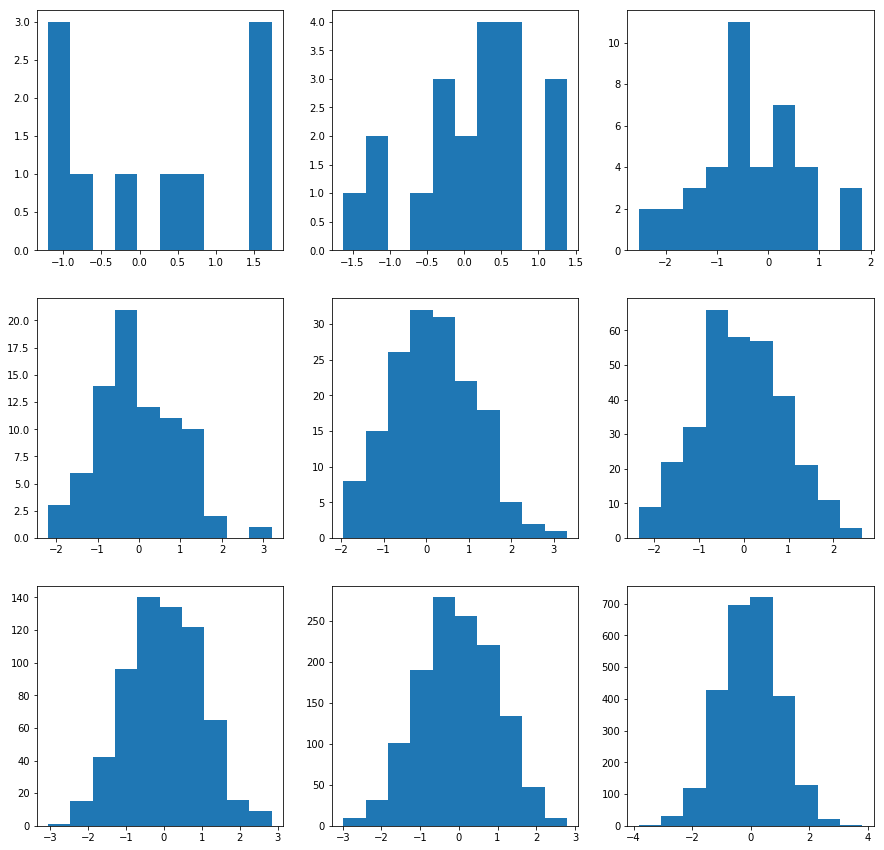

In [2]:
fig, ax = plt.subplots(3, 3,figsize=(15,15))
n = 10
for i in range (3):
    for j in range (3):
        s = np.random.normal(0,1,n)
        ax[i,j].hist(s)
        n = n*2
plt.show()

#### Problem 2.1

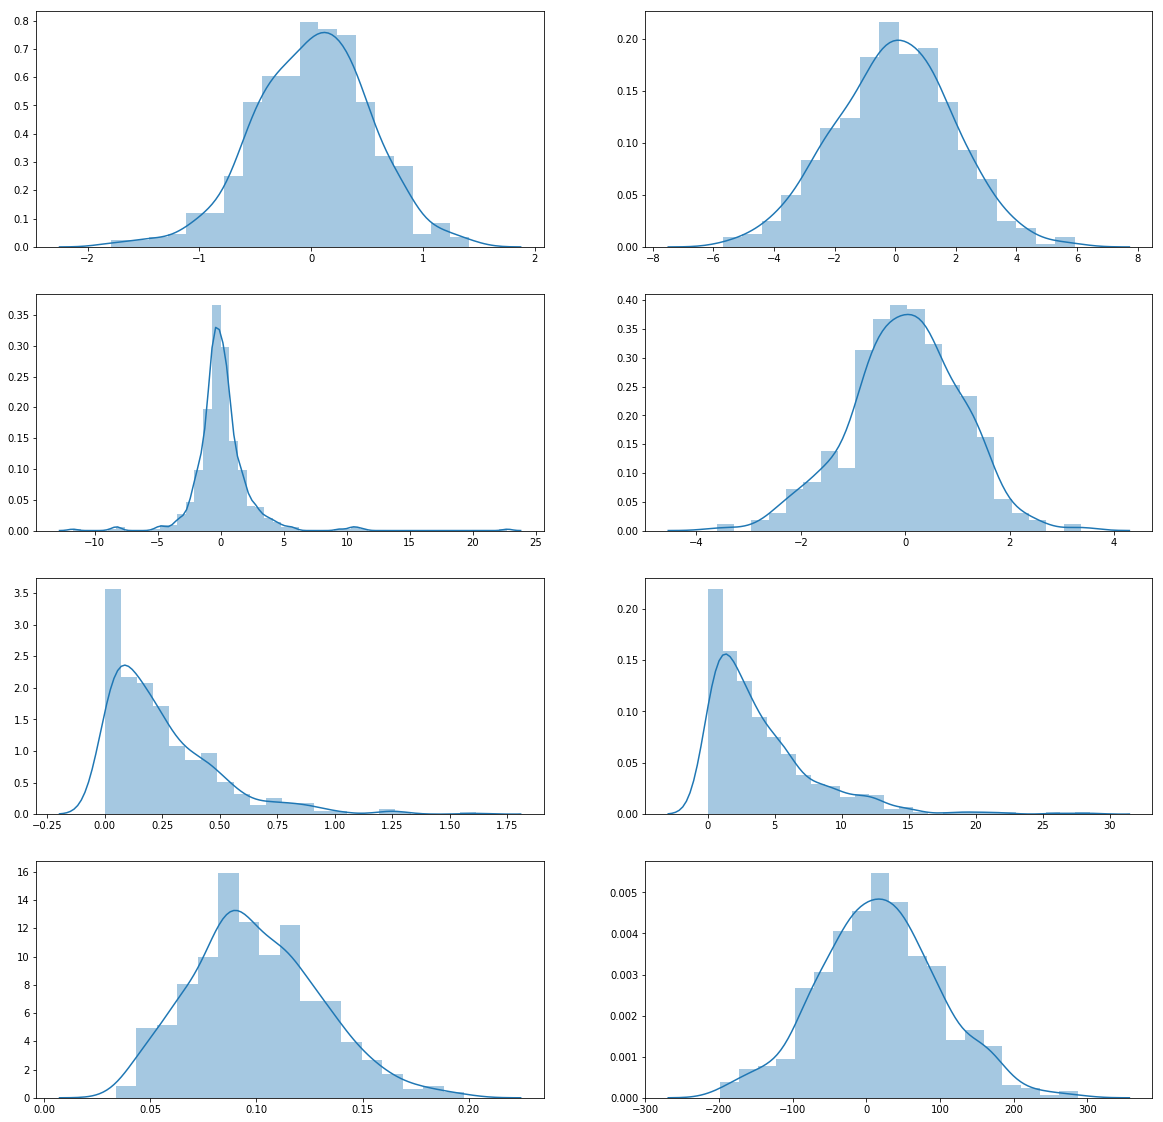

In [3]:
fig, ax = plt.subplots(4, 2,figsize=(20,20))
m = 500
sns.distplot(np.random.normal(0,0.5,m), ax=ax[0,0])
sns.distplot(np.random.normal(0,2,m), ax=ax[0,1])
sns.distplot(np.random.standard_t(2,m), ax=ax[1,0])
sns.distplot(np.random.standard_t(20,m), ax=ax[1,1])
sns.distplot(np.random.exponential(0.25,m), ax=ax[2,0])
sns.distplot(np.random.exponential(4,m), ax=ax[2,1])
sns.distplot(np.random.beta(10,90,m), ax=ax[3,0])
sns.distplot(np.random.normal(20,80,m), ax=ax[3,1])
plt.show()

#### Problem 2.2

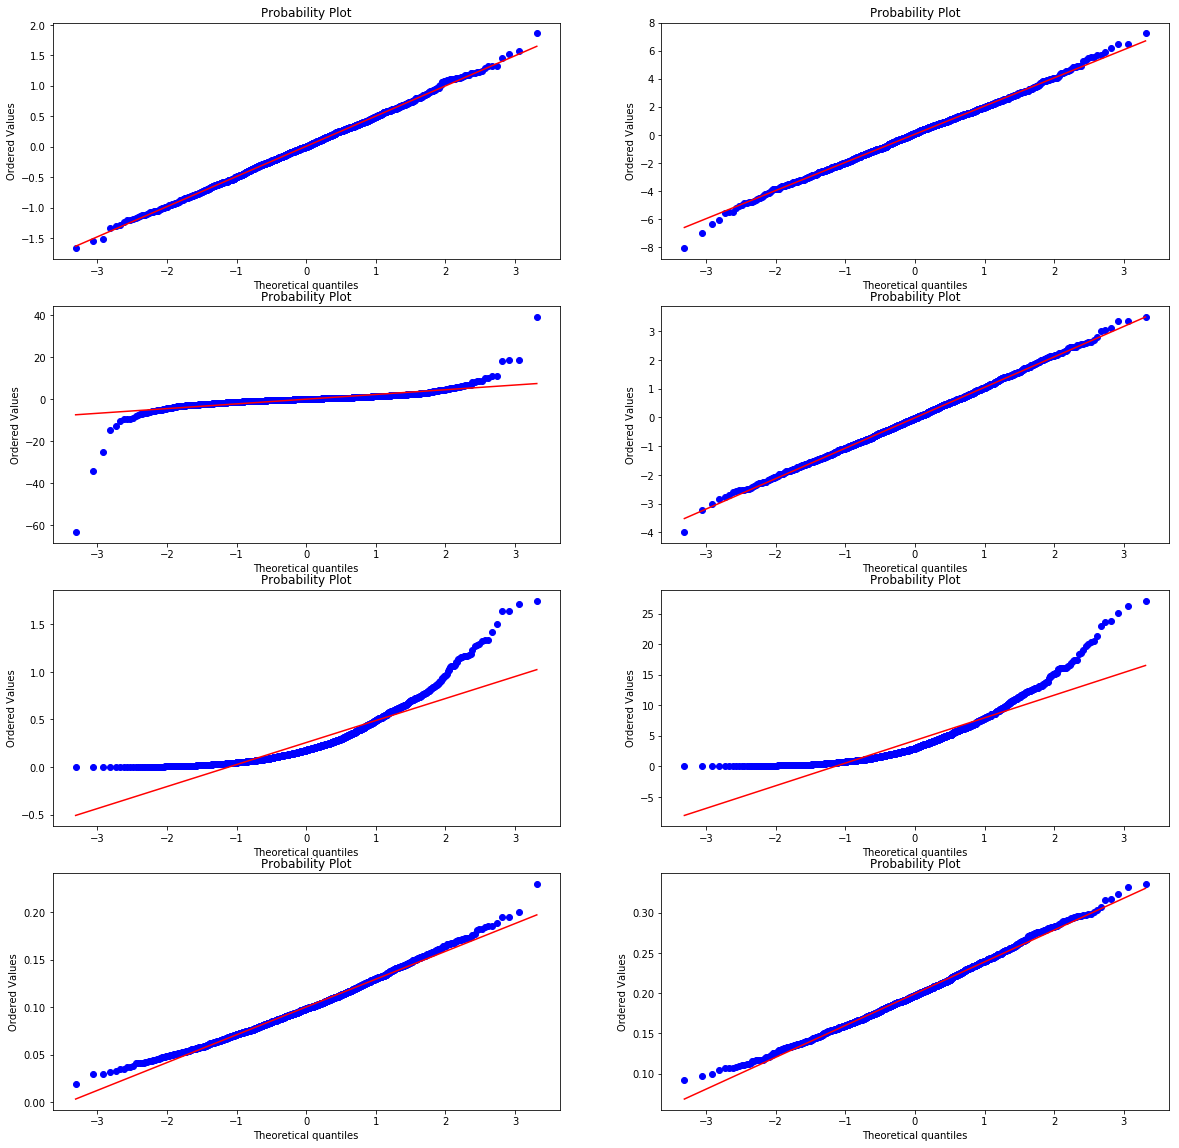

In [4]:
fig, ax = plt.subplots(4, 2,figsize=(20,20))
sc.stats.probplot(np.random.normal(0,0.5,1500), plot=ax[0,0])
sc.stats.probplot(np.random.normal(0,2,1500), plot=ax[0,1])
sc.stats.probplot(np.random.standard_t(2,1500), plot=ax[1,0])
sc.stats.probplot(np.random.standard_t(20,1500), plot=ax[1,1])
sc.stats.probplot(np.random.exponential(0.25,1500), plot=ax[2,0])
sc.stats.probplot(np.random.exponential(4,1500), plot=ax[2,1])
sc.stats.probplot(np.random.beta(10,90,1500), plot=ax[3,0])
sc.stats.probplot(np.random.beta(20,80,1500), plot=ax[3,1])
plt.show()

#### Problem 2.3 Interpret S-shape, U-shape

### Simulate Random Waypoint & Look At What You Have Done

#### Problem 3

In [5]:
SCIPER = 219665
N = 100
l = 1000
L = 1000
V_MIN = 0.5 + 0.02*(SCIPER%21)
V_MAX = 3 + 0.2*(SCIPER%11)
T_STOP = 86400

In [6]:
def get_pos_n(l,L):
    return (random.randint(0,l), random.randint(0,L))

In [7]:
def get_speed_n(v_min, v_max):
    return random.uniform(v_min, v_max)

In [8]:
def get_next_x(l, L, m_n, t_n, v_n):
    next_m = get_pos_n(l,L)
    dist = distance.euclidean(next_m, m_n)
    next_t = t_n + (dist/v_n)
    return (next_m, next_t)

In [9]:
def calc(l, L, v_min, v_max, t_stop):
    t = 0
    v = get_speed_n(v_min, v_max)
    m = get_pos_n(l, L)
    results = []
    while t < t_stop:
        res = get_next_x(l, L, m, t, v)
        results.append(res)
        m = res[0]
        t = res[1]
        v = get_speed_n(v_min, v_max)
    return results

In [10]:
results = []
times = []
tot_time = 0
for i in range (N):
    start = time.time()
    res = calc(l, L, V_MIN, V_MAX, T_STOP)
    end = time.time()
    results.append(res)
    times.append(end-start)
    tot_time = tot_time + (end-start)

In [11]:
len(results)

100

#### Problem 3.1

In [12]:
len(results[0])

min_ = sys.maxsize
max_ = -sys.maxsize-1
count = 0

for i in range(len(results)):
    nb = len(results[i])
    count = count + nb
    if nb >max_:
        max_ = nb
    elif nb < min_:
        min_ = nb
        
print("Min:", min_)
print("Max:", max_)
print("Mean: {0:.3f}".format(count/len(results)))

Min: 272
Max: 345
Mean: 309.900


In [13]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'lavender']

#### Problem 3.2

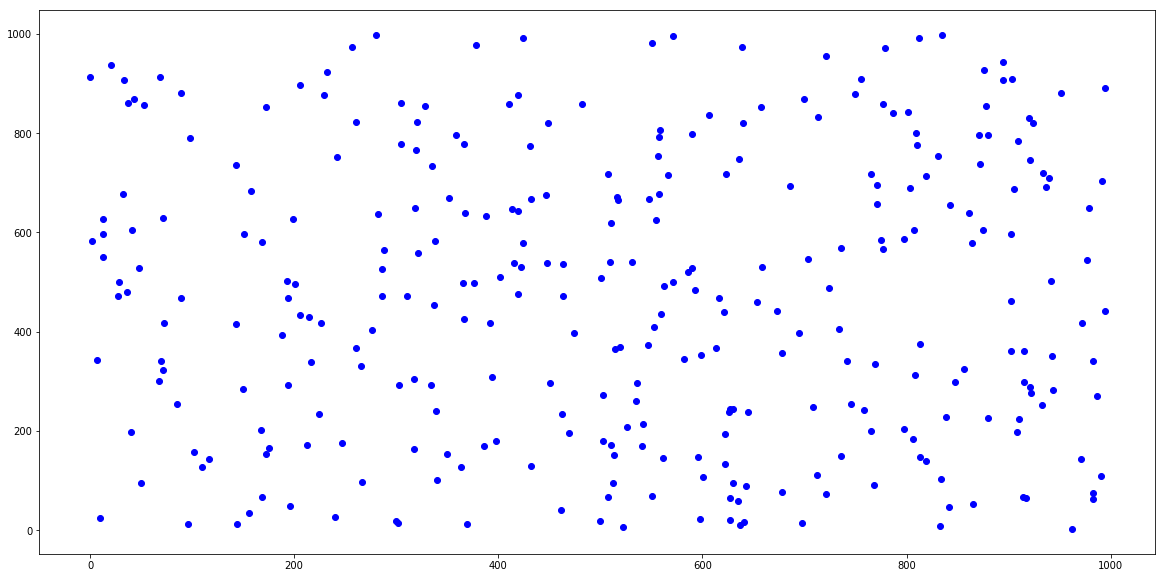

In [14]:
fig = plt.figure(figsize=(20,10))
for i in range(1):
    x_val = [x[0][0] for x in results[i]]
    y_val = [x[0][1] for x in results[i]]
    plt.plot(x_val, y_val, colors[i], marker='o', linestyle='')

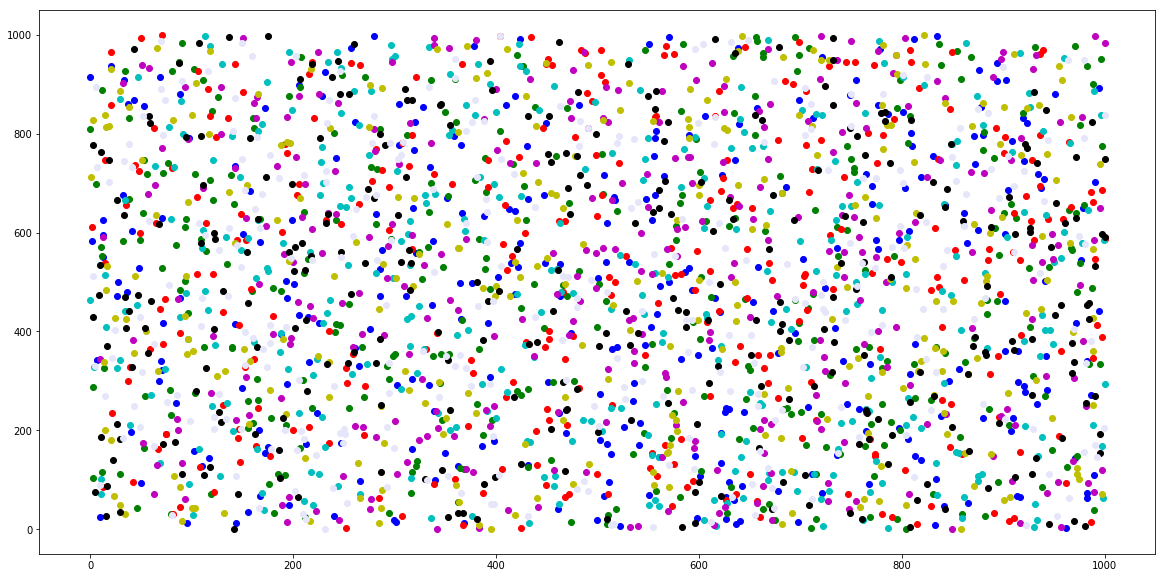

In [15]:
fig8 = plt.figure(figsize=(20,10))
for i in range(8):
    x_val = [x[0][0] for x in results[i]]
    y_val = [x[0][1] for x in results[i]]
    plt.plot(x_val, y_val, colors[i], marker='o', linestyle='')

In [16]:
start = time.time()
calc(l, L, V_MIN, V_MAX, T_STOP)
end = time.time()
print("Time for 1 day of simultated time (1 simulation): {0:.4f} s".format(end-start))
print("Mean time for 1 day of simultated time (100 simulations): {0:.4f} s".format(tot_time/100.0))


Time for 1 day of simultated time (1 simulation): 0.0114 s
Mean time for 1 day of simultated time (100 simulations): 0.0060 s


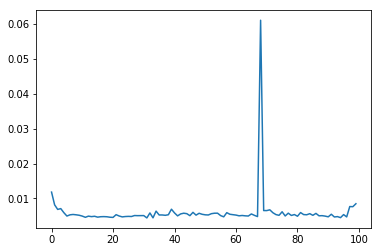

In [17]:
plt.plot(times)

### Different Viewpoints

#### Event Average (Palm) Viewpoint

#### Problem a)

In [18]:
t_0 = [x[1] for x in results[0]]
x_all = []
y_all = []
t_all = []
for i in range(len(results)):
    x_all = x_all + ([x[0][0] for x in results[i]])
    y_all = y_all + ([x[0][1] for x in results[i]])
    t_all = t_all + ([x[1] for x in results[i]])

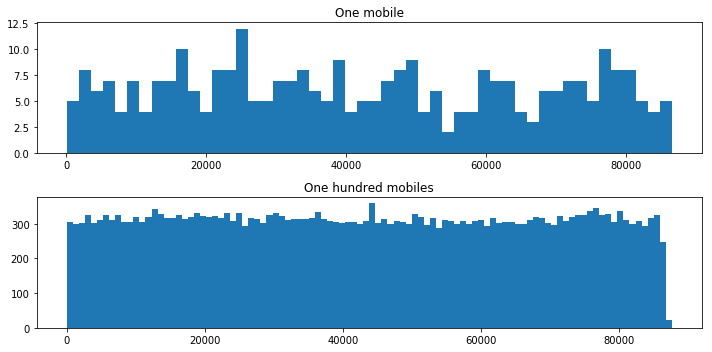

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
ax[0].set_title('One mobile')
ax[0].hist(t_0, bins=50)
ax[1].set_title('One hundred mobiles')
ax[1].hist(t_all, bins=100)
plt.tight_layout()
plt.show()

#### Problem b)

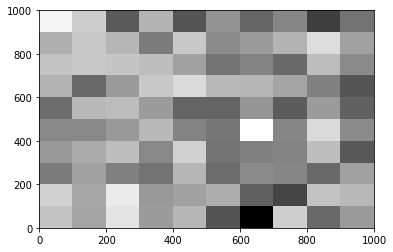

In [22]:
plt.hist2d(x_all,y_all, cmap=plt.cm.Greys)
plt.show()

#### Time Average Viewpoint

#### Problem a)

#### Problem b)

#### Problem c)

### Confidence Intervals

#### Confidence Intervals for Medians and Means

#### Problem 4.1.1

#### Problem 4.1.2

#### Problem 4.1.3

#### Problem 4.1.4

#### Prediction Intervals for Samples 

#### Problem 4.2.1

#### Problem 4.2.2

#### Problem 4.2.3

#### Problem 4.2.4